### Data wrangling:  
> Data wrangling process involves converting the raw data in to a format that is better for analysis.

In [126]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [77]:
# Import data
data = pd.read_csv("auto.csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [114]:
# The csv file doesn't have column names
# creating a list of column names

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [115]:
df = pd.read_csv("auto.csv",names=headers)
df.head() # displaying first 5 rows of data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [116]:
df.describe().transpose() # statistical summary of numerical columns of data frame 'df'

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


### Identifying and replacing missing values

In [117]:
# we can see in 'normalized-losses', some values are represented as question marks.
# The missing data is represneted as ?. So, we need to replace this ? with NaN(not a number), which
# is python's default missing value marker

df.replace("?",np.nan,inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<strong> Counting the number of missing values in each column </strong>

In [52]:
missingcount_by_column= df.isnull().sum().sort_values(ascending=False)
missingcount_by_column

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
horsepower            2
num-of-doors          2
length                0
make                  0
fuel-type             0
aspiration            0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
height                0
width                 0
highway-mpg           0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
compression-ratio     0
city-mpg              0
symboling             0
dtype: int64

In [64]:
freq = (missingcount_by_column[:7]*100)/len(df)
summ =  missingcount_by_column[:7]

missing_data = pd.concat([summ,freq],axis=1)
missing_data

,0,1
normalized-losses,41,20.00000
price,4,1.95122
stroke,4,1.95122
bore,4,1.95122
peak-rpm,2,0.97561
horsepower,2,0.97561
num-of-doors,2,0.97561


In [66]:
# Each column has a total of 205 rows of data, where as the following 7 columns have missing data:
missing_data.columns=['missingdatacount','missing_frequency/coulmn']
missing_data

,missingdatacount,missing_frequency/coulmn
normalized-losses,41,20.00000
price,4,1.95122
stroke,4,1.95122
bore,4,1.95122
peak-rpm,2,0.97561
horsepower,2,0.97561
num-of-doors,2,0.97561


### Dealing with missing data

We can deal with missing data in 2 ways:
-  drop entire row or column
-  replace data with a suitable value for eg: mean, frequency etc

None of the predictor columns are empty enough to drop entirely, only some values are missing in few columns so
we should not drop the column entirely.<br>
Hence, we replace each column with a suitable value for that column.

#### Dropping the whole row
- price : price column has 4 missing values. This is the target variable and we want to predict the
car prices based on the remaining column. Hence, we don't want to replace it's value, we drop the rows
where it has missing values.

In [138]:
df[df['price'].isnull()==True] # fetching the rows where price column has missing data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
44,1,122,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
45,0,122,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
129,1,122,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,NaN


In [139]:
# dropping the missing values in price column and checking if it worked or not
df.dropna(subset=['price'],inplace=True)
df[df['price'].isnull()==True]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


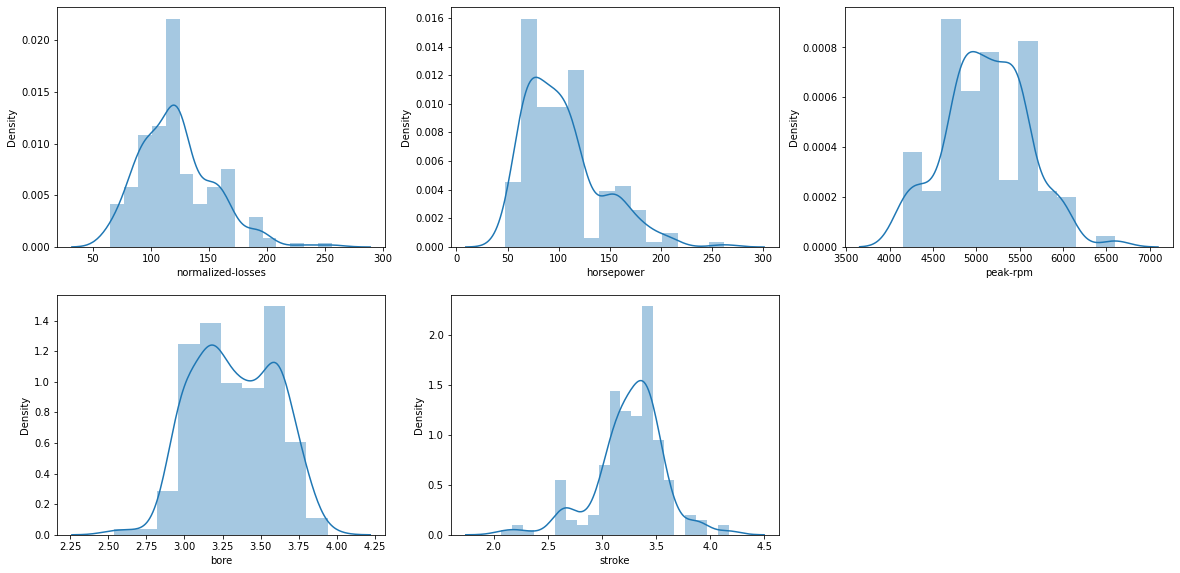

In [140]:
cols = ['normalized-losses','horsepower','peak-rpm','bore','stroke']
plt.figure(figsize=(20,15))
plt_number = 1

for variable in cols:
    if plt_number <=6:
        ax = plt.subplot(3,3,plt_number)
        sns.distplot(df[variable])
    plt_number+=1

In [141]:
# data is following normal distribution in these columns, so we can replace missing values with mean
for col in cols:
    avg = df[col].astype("float").mean(axis=0) # find the mean of each column
    df[col].replace(np.nan,avg,inplace=True)   # replace nan with column mean 

num-of-doors         2
price                0
highway-mpg          0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
body-style           0
dtype: int64

In [151]:
# replacing missing values in 'num-of-doors' column
print(df['num-of-doors'].value_counts())

four    113
two     86 
Name: num-of-doors, dtype: int64


In [155]:
# four is most frequetly occuring, so we replace nans with four in this column
frequent = df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].replace(np.nan,frequent,inplace=True)

In [156]:
df.isnull().sum().sort_values(ascending=False)[:8] # we can see that, all missing values are replaced

price                0
highway-mpg          0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
dtype: int64

In [157]:
pd.set_option('display.max_columns', None)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [158]:
df.dtypes #  checking the datatype of each column

symboling            int64  
normalized-losses    object 
make                 object 
fuel-type            object 
aspiration           object 
num-of-doors         object 
body-style           object 
drive-wheels         object 
engine-location      object 
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          int64  
engine-type          object 
num-of-cylinders     object 
engine-size          int64  
fuel-system          object 
bore                 object 
stroke               object 
compression-ratio    float64
horsepower           object 
peak-rpm             object 
city-mpg             int64  
highway-mpg          int64  
price                object 
dtype: object

#### We can see that some of the columns have wrong data types, before further analysis first we need to convert them to correct datatype.
- The column 'normalized-losses' contains numeric values so it should be set to interger data type.
- 'bore' and 'stroke' columns have float data so it should be set to data type 'float'.
- 'horsepower' ,'peak-rpm'  and 'price' should be converted to  integer data type.

### Dealing with wrong datatypes

In [188]:
int_cols = ['normalized-losses']
float_cols = ['bore','stroke','price','horsepower','peak-rpm']

for col in int_cols:
    df[col] = df[col].astype('int64')
    
for col in float_cols:
    df[col] = df[col].astype('float64')
# checking data type of each column after conversion
df.dtypes

symboling            int64  
normalized-losses    int64  
make                 object 
fuel-type            object 
aspiration           object 
num-of-doors         object 
body-style           object 
drive-wheels         object 
engine-location      object 
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          int64  
engine-type          object 
num-of-cylinders     object 
engine-size          int64  
fuel-system          object 
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             int64  
highway-mpg          int64  
price                float64
dtype: object

### Binning

- Binning transforms continuos numeric values into discrete categories for grouped analysis.

In [186]:
print(df['horsepower'].describe()[['min','max']],'\n')
print(f"Unique values in horsepower column: {df['horsepower'].nunique()}")

min    48.0 
max    262.0
Name: horsepower, dtype: float64 

Unique values in horsepower column: 59


<AxesSubplot:xlabel='horsepower', ylabel='Count'>

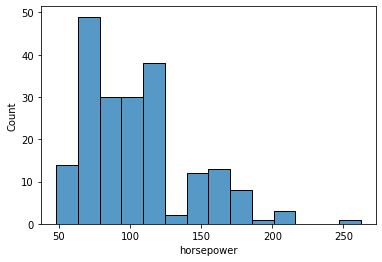

In [187]:
sns.histplot(df['horsepower'])

In [189]:
# we can bin horsepower into 3 categories and see how the price is varying among 3 catgories.
# the minimum horsepower is 48 and max is 262. Inorder to cut this range into 3 bins, we need to make 4 cuts

bins = np.linspace(df['horsepower'].min(),df['horsepower'].max(),num=4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [190]:
categories = ['low','medium','high'] #names for categories

In [194]:
df['horsepower_binned']= pd.cut(df['horsepower'],bins,labels=categories,include_lowest=True) # cutting dataframe into catgories based on bins
df[['horsepower','horsepower_binned']]

,horsepower,horsepower_binned
0,111.0,low
1,111.0,low
2,154.0,medium
3,102.0,low
4,115.0,low
...,...,...
200,114.0,low
201,160.0,medium
202,134.0,medium
203,106.0,low


In [192]:
df['horsepower_binned'].value_counts()

low       153
medium    43 
high      5  
Name: horsepower_binned, dtype: int64

<AxesSubplot:xlabel='horsepower_binned', ylabel='Count'>

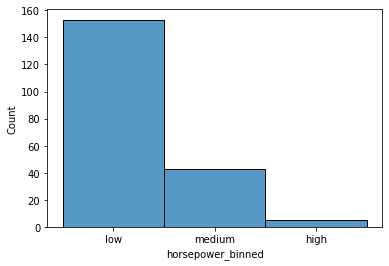

In [195]:
sns.histplot(df['horsepower_binned']) # histogram after binning

In [196]:
df[df['horsepower_binned']=='high']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower_binned
49,0,122,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0,high
105,3,194,nissan,gas,turbo,two,hatchback,rwd,front,91.3,170.7,67.9,49.7,3139,ohcv,six,181,mpfi,3.43,3.27,7.8,200.0,5200.0,17,23,19699.0,high
126,3,122,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,32528.0,high
127,3,122,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,34028.0,high
128,3,122,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,37028.0,high


In [197]:
# similarly we analyse 'engine-size' column
df['engine-size'].describe()

count    201.000000
mean     126.875622
std      41.546834 
min      61.000000 
25%      98.000000 
50%      120.000000
75%      141.000000
max      326.000000
Name: engine-size, dtype: float64

In [199]:
bins = np.linspace(df['engine-size'].min(),df['engine-size'].max(),4)
bins


array([ 61.        , 149.33333333, 237.66666667, 326.        ])

In [211]:
categories =['small','medium','large']
df['enginesize_cut'] = pd.cut(df['engine-size'],bins,labels=categories,include_lowest=True)
df['enginesize_cut'].value_counts()

small     100
medium    88 
large     10 
Name: enginesize_cut, dtype: int64

In [212]:
df[df['enginesize_cut']=='large']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower_binned,price_cut,enginesize_cut
15,0,122,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0,medium,high,large
16,0,122,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0,medium,high,large
17,0,122,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0,medium,high,large
47,0,145,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250.0,medium,high,large
48,0,122,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550.0,medium,high,large
71,-1,122,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,56.5,3740,ohcv,eight,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0,medium,high,large
72,3,142,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0,medium,high,large
126,3,122,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,32528.0,high,high,large
127,3,122,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,34028.0,high,high,large
128,3,122,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,37028.0,high,high,large


In [215]:
df['price'].describe()

count    201.000000  
mean     13207.129353
std      7947.066342 
min      5118.000000 
25%      7775.000000 
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [218]:
categories = ['low','medium','high']
bins = np.linspace(df['horsepower'].min(),df['horsepower'].max(),num=4)
df['price_binned'] = pd.cut(df['engine-size'],bins,labels=categories,include_lowest=True)
df['price_binned'].value_counts()

low       100
medium    88 
high      10 
Name: price_binned, dtype: int64

In [219]:
df[df['price_binned']=='high']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower_binned,enginesize_cut,price_binned
15,0,122,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0,medium,large,high
16,0,122,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0,medium,large,high
17,0,122,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0,medium,large,high
47,0,145,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250.0,medium,large,high
48,0,122,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550.0,medium,large,high
71,-1,122,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,56.5,3740,ohcv,eight,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0,medium,large,high
72,3,142,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0,medium,large,high
126,3,122,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,32528.0,high,large,high
127,3,122,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,34028.0,high,large,high
128,3,122,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,37028.0,high,large,high


In [222]:
pd.set_option('display.max_rows',None)
df[df['price_binned']=='medium']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower_binned,enginesize_cut,price_binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0,low,medium,medium
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0,low,medium,medium
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0,medium,medium,medium
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0,low,medium,medium
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0,low,medium,medium
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0,low,medium,medium
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0,low,medium,medium
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0,medium,medium,medium
12,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2710,ohc,six,164,mpfi,3.31,3.19,9.00,121.0,4250.0,21,28,20970.0,medium,medium,medium
13,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2765,ohc,six,164,mpfi,3.31,3.19,9.00,121.0,4250.0,21,28,21105.0,medium,medium,medium


<AxesSubplot:xlabel='engine-size', ylabel='price'>

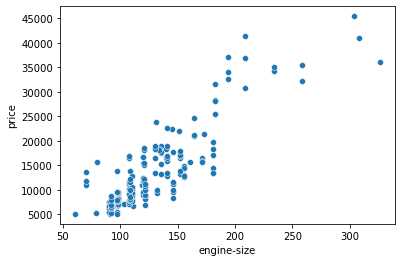

In [223]:
# from the above analysis, we can see that engine size has high influence on car price.
# Engine size has direct influence on car price, as the size of engine increases price is also increasing.

sns.scatterplot(df['engine-size'],df['price'])

### Finally converting catgorical columns to numerical columns

In [230]:
categorical_cols = [column for column in df.columns if df[column].dtype=='object']
categorical_cols

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [233]:
for column in df.columns:
    if df[column].dtype=='object':
        print(df[column].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [245]:
# concatinating original dataframe df, with dummy variable columns 
final_df = pd.concat([df,pd.get_dummies(df[categorical_cols],drop_first=True)],axis=1)
# and dropping the original categorical columns
final_df.drop(columns=categorical_cols,inplace=True)
final_df.drop(columns=['horsepower_binned', 'enginesize_cut','price_binned'],inplace=True)
final_df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_gas,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,122,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [246]:
final_df.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel-type_gas', 'aspiration_turbo', 'num-of-doors_two',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-location_rear', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
       'num-of-cylinders_five', 'num-of-cylinders_four',
       'num-of

In [ ]:
# The data is now ready to be trained using, machine learning models(regression models)